In [2]:
import numpy as np
import pandas as pd 
import re 
import nltk
nltk.download('stopwords')  
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to /home/cilia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
tweets = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")

In [4]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
tweets.shape

(14640, 15)

### Useful methods

In [9]:
processed_tweets = []
 
def clean_data(X) :
    
    processed_tweets = []
    for tweet in range(0, len(X)):  
    # Remove all the special characters
        processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
        processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
        processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
        processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
        processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
        processed_tweet = processed_tweet.lower()
 
        processed_tweets.append(processed_tweet)
    
def put_pos_tags(X):
    pos_X = []
    print(X)
    
    for tweet in range(len(X)):
        tokens = nltk.word_tokenize(X[tweet])
        pos    = nltk.pos_tag(tokens)
        s= " "
        s = s.join([a+"_"+b for a,b in pos])
        pos_X.append(s)
    return pos_X


def vectorize_features(data, w ):  # Using TfidfVectoeizer
    
    X = data.iloc[:, 10].values  
    clean_data(X)
    
    if w == 'tfidf':
        vectorizer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'),ngram_range=(1,3))  
    else:
        vectorizer = CountVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'),ngram_range=(1,3))  
 
    X_ = vectorizer.fit_transform(X).toarray()
    return (vectorizer,X_)

    

def split_data(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return (X_train, X_test, y_train, y_test)

def plot(x_value,data_):
    #Affichage avec la bibliothèque graphique intégrée à Notebook
    %matplotlib inline
    sns.countplot(x=x_value, data=data_)
    
def evaluate_model(y_test,predictions):
    """
    To evaluate the classification model that you developed, 
    you can use confusion matrix, classification report, and accuracy as performance metrics. 
    These metrics can be calculated using classes from sklearn.metrics  module as shown below:
    """
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  
    print(accuracy_score(y_test, predictions))


### Splitting data and training model

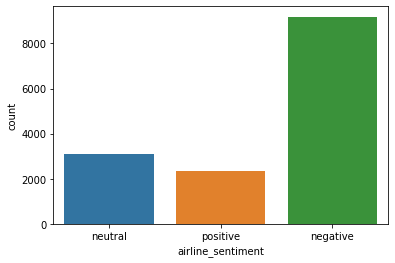

In [13]:

# Some vizualisation 
plot('airline_sentiment', tweets)

# Target vector
y = tweets.iloc[:, 1].values

# Create the feature vectors 
tfidfconverter,X_tfidf = vectorize_features(tweets, 'tfidf')

# Split the data into training and testing sets with ratio 8:2
X_train, X_test, y_train, y_test = split_data(X_tfidf,y)


cls = RandomForestClassifier(n_estimators=100, random_state=0)  
cls.fit(X_train, y_train)


### Evaluation of model

In [14]:
predictions = cls.predict(X_test)
evaluate_model(y_test,predictions)

[[1702  116   52]
 [ 319  255   40]
 [ 137   62  245]]
              precision    recall  f1-score   support

    negative       0.79      0.91      0.85      1870
     neutral       0.59      0.42      0.49       614
    positive       0.73      0.55      0.63       444

    accuracy                           0.75      2928
   macro avg       0.70      0.63      0.65      2928
weighted avg       0.74      0.75      0.74      2928

0.7520491803278688


### Test Classification

In [17]:
test = tfidfconverter.transform(["I passed a very hard time with you, to never repeat"]).toarray()

In [18]:
pred = cls.predict(test)
print(pred)

['negative']


# Model using TF weighting 

In [23]:
# Create the feature vectors 
tfconverter,X_tf = vectorize_features(tweets, 'tf')

# Split the data into training and testing sets with ratio 8:2
X_train, X_test, y_train, y_test = split_data(X_tf,y)


cls = RandomForestClassifier(n_estimators=100, random_state=0)  
cls.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
predictions = cls.predict(X_test)
evaluate_model(predictions,y_test)

[[1621  239   94]
 [ 169  325   84]
 [  80   50  266]]
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      1954
     neutral       0.53      0.56      0.55       578
    positive       0.60      0.67      0.63       396

    accuracy                           0.76      2928
   macro avg       0.67      0.69      0.68      2928
weighted avg       0.76      0.76      0.76      2928

0.755464480874317


# USING POS tags

In [37]:
X = tweets.iloc[:, 10].values 
clean_X = clean_data(X)
pos_X = put_pos_tags(X)

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 ... '@AmericanAir Please bring American Airlines to #BlackBerry10'
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']


In [38]:
# vectorize features
tfidfconverter,X_ = vectorize_features(tweets, w='tfidf')
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=0)

In [39]:
cls = RandomForestClassifier(n_estimators=100, random_state=0)  
cls.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
# Prediction and evaluation 
predictions = cls.predict(X_test)
evaluate_model(y_test,predictions)

[[1702  116   52]
 [ 319  255   40]
 [ 137   62  245]]
              precision    recall  f1-score   support

    negative       0.79      0.91      0.85      1870
     neutral       0.59      0.42      0.49       614
    positive       0.73      0.55      0.63       444

    accuracy                           0.75      2928
   macro avg       0.70      0.63      0.65      2928
weighted avg       0.74      0.75      0.74      2928

0.7520491803278688
